{'dx': 230, 'dy': 205, 'x0': 170, 'y0': 50}


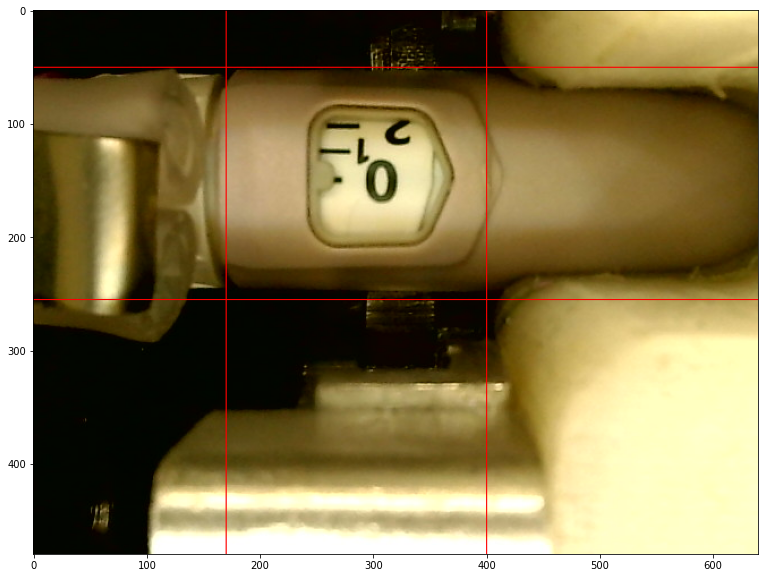

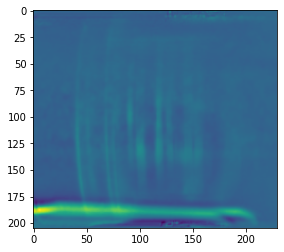

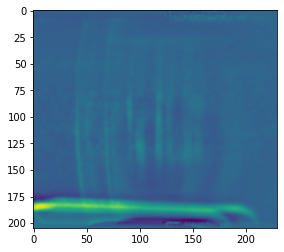

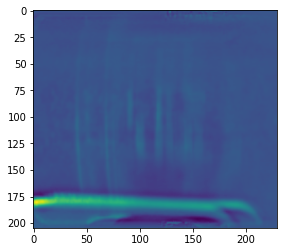

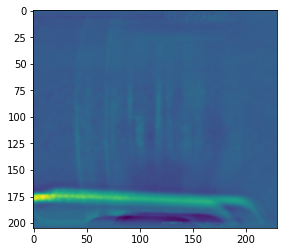

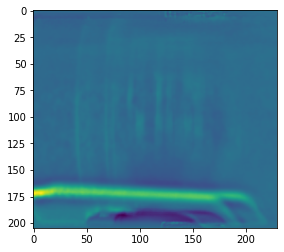

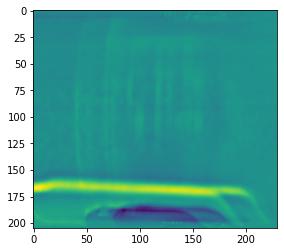

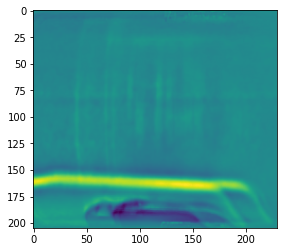

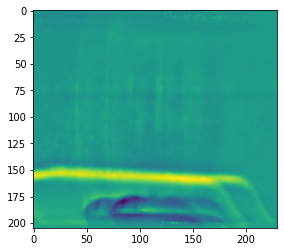

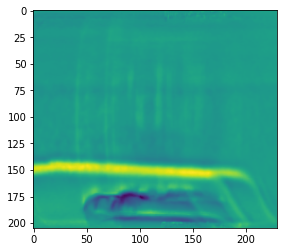

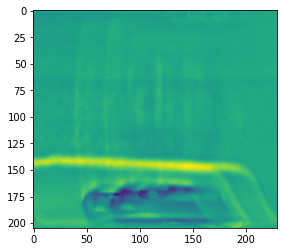

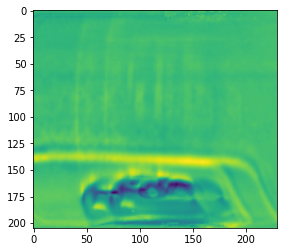

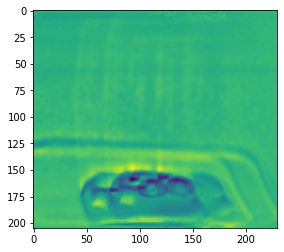

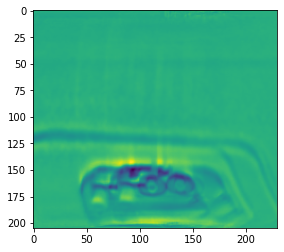

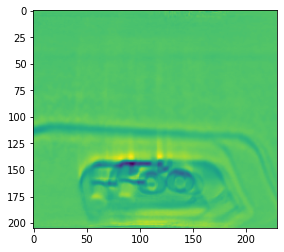

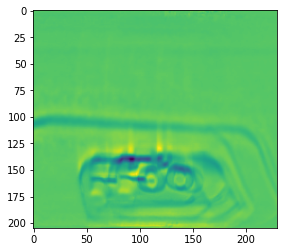

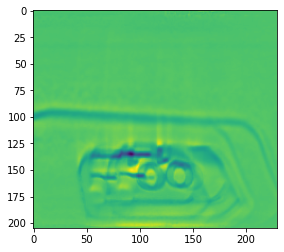

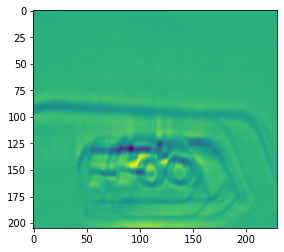

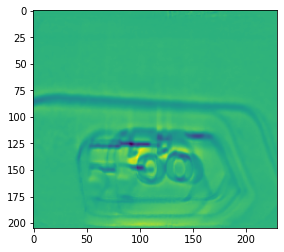

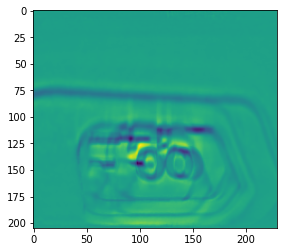

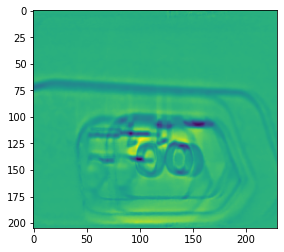

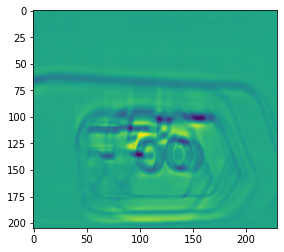

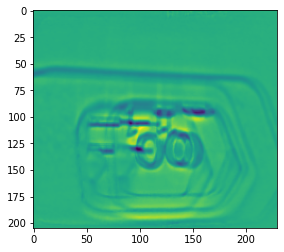

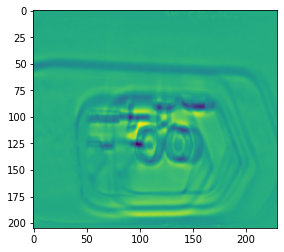

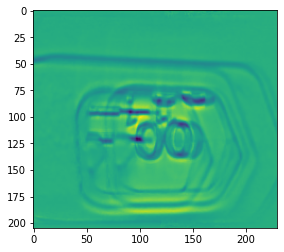

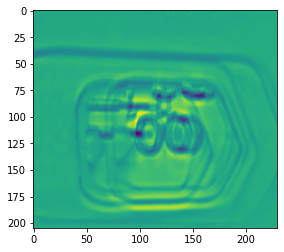

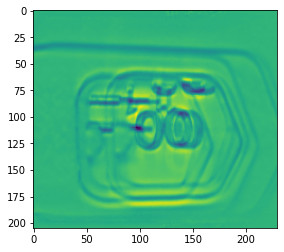

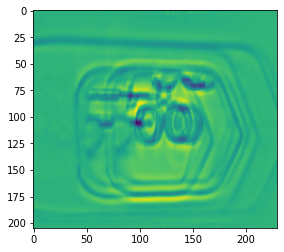

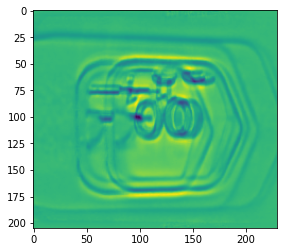

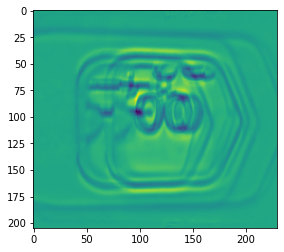

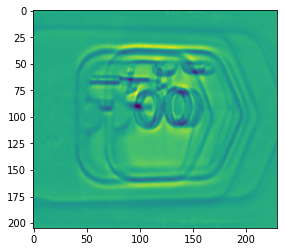

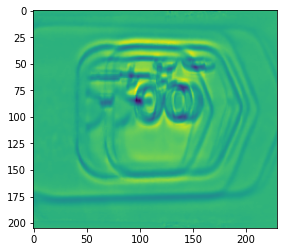

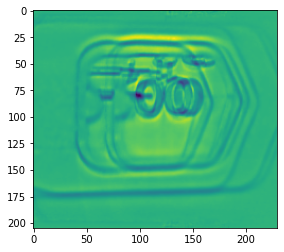

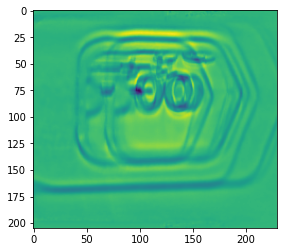

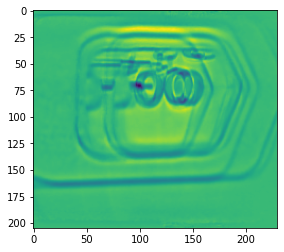

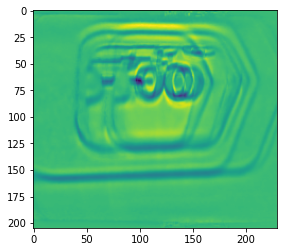

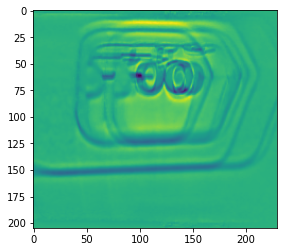

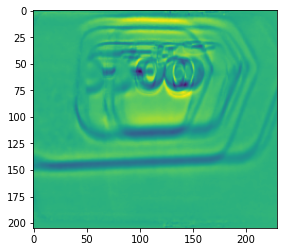

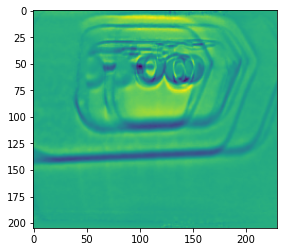

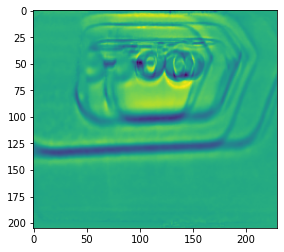

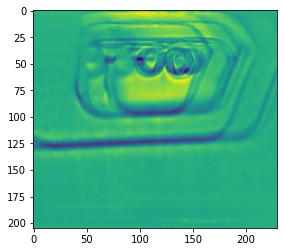

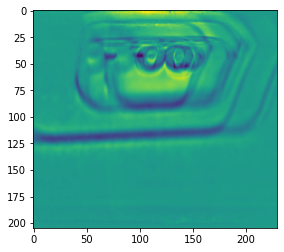

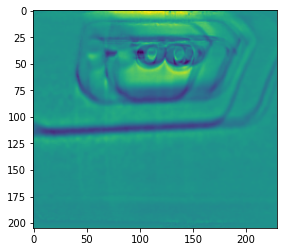

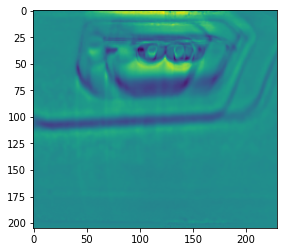

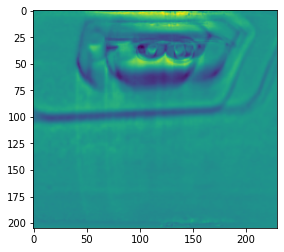

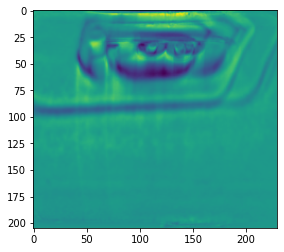

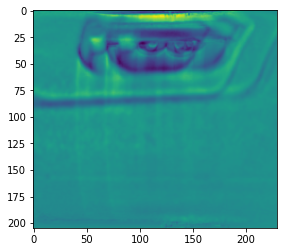

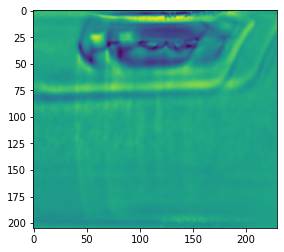

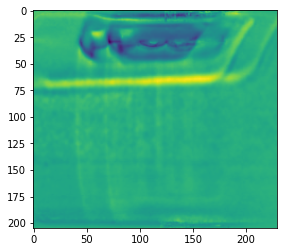

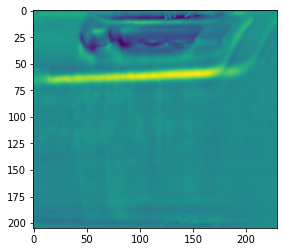

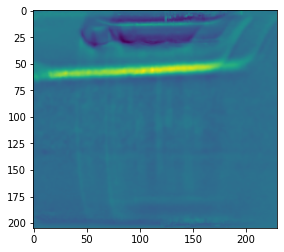

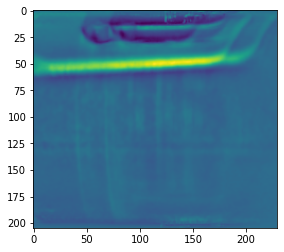

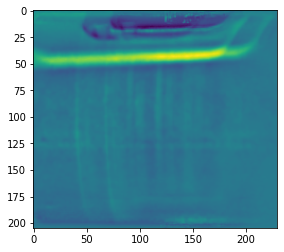

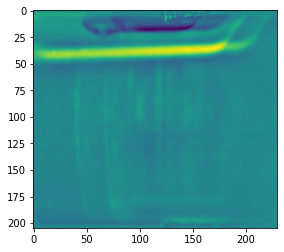

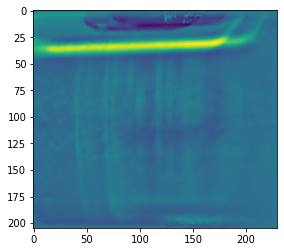

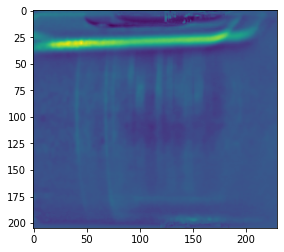

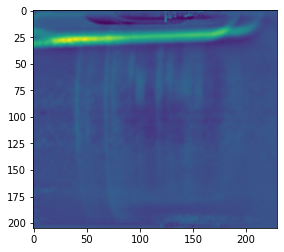

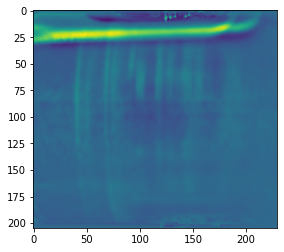

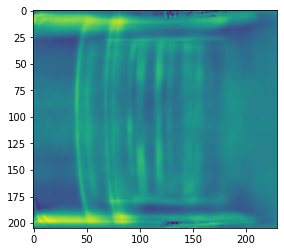

In [27]:
import json
import glob
from ipywidgets import *
import matplotlib.pyplot as plt
import cv2
import copy

def load_data():
    with open('annotaion.json') as f:
        data = json.loads(f.read())
    return data

data = load_data()
roi = data['101']['dosing_roi']
img = cv2.imread('../dump/dosing_192.168.44.101.png')[:,:,::-1]
print(roi)
img[roi['y0'],:] = [255,0,0]
img[roi['y0']+roi['dy'],:] = [255,0,0]
img[:,roi['x0']] = [255,0,0]
img[:,roi['x0']+roi['dx']] = [255,0,0]

plt.figure(figsize=(18, 10))
plt.imshow(img)






import numpy as np
import pickle
import cv2
import json
import matplotlib.pyplot as plt
import sklearn

node = '101'
component = 'dosing'

clf = pickle.load(open('../../models/%s_%s.clf'%(component, node), 'rb'))
# roi = annotations[node][component+'_roi']

coefs = np.array([j.base_estimator.coef_ for j in clf.calibrated_classifiers_]).mean(axis=0)
coefs = coefs.reshape(coefs.shape[0], roi['dy'], -1)

for i in range(coefs.shape[0]):
    plt.figure(i)
    plt.imshow(coefs[i])
    plt.show()





-1.0 49.0


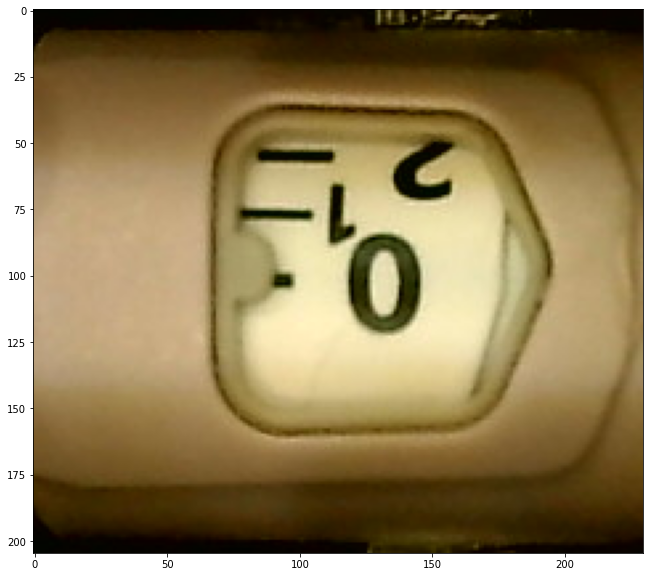

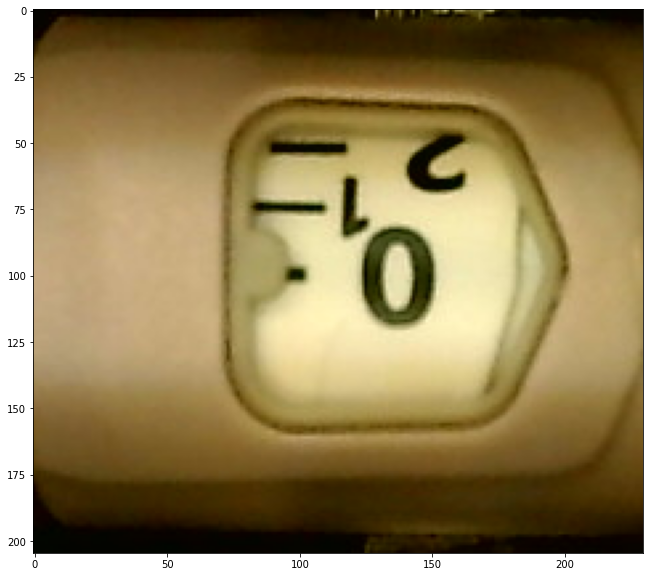

In [26]:
frame = cv2.imread('../dump/dosing_192.168.44.101.png')[:,:,::-1]
frame1 = frame[roi['y0']:roi['y0']+roi['dy'], roi['x0']:roi['x0']+roi['dx'], :]
frame2 = cv2.imread('../dump/aaaa.png')[:,:,::-1]
cls1 = clf.predict([cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY).flatten()])[0]
cls2 = clf.predict([cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY).flatten()])[0]
print(cls1, cls2)
plt.figure(figsize=(18, 10))
plt.imshow(frame2)

plt.figure(figsize=(18, 10))
plt.imshow(frame1)